In [170]:
import pandas
import numpy as numpy
import seaborn as seaborn
import matplotlib.pyplot as pyplot
from sklearn import preprocessing

class MyDataAnalysisHelper:

    def filter_by_survival(data, survived: bool):
        return data[data['Survived'] == survived]
    
    def build_heatmap(correlation_data, graph_title: str):
        pyplot.figure(figsize=(7, 5))
        seaborn.heatmap(correlation_data, annot=True, cmap='seismic', center=0)
        pyplot.title(graph_title)
        pyplot.show()
    
    def build_parameter_distribution_graph(data, columns: int, rows: int):
        fig, axs = pyplot.subplots(ncols=columns, nrows=rows, figsize=(20, 10))
        index = 0
        axs = axs.flatten()
        for k,v in data.items():
            seaborn.histplot(v, ax=axs[index])
            index += 1
        pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    
    def build_dot_distribution(data, column_names: list[str], y_name: str, columns: int, rows: int):
        min_max_scaler = preprocessing.MinMaxScaler()
        x = data.loc[:,column_names]
        y = data[y_name]
        x = pandas.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_names)
        fig, axs = pyplot.subplots(ncols=columns, nrows=rows, figsize=(20, 10))
        index = 0
        axs = axs.flatten()
        for i, k in enumerate(column_names):
            seaborn.regplot(y=y, x=x[k], ax=axs[i])
        pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [171]:
# Read data from file
data = pandas.read_csv("/Users/Viktoryia/Documents/Programming/Data_Science/Lesson_7/Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId: Unique identifier for each passenger.

Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).

Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).

Sex: Gender of the passenger.

Age: Age of the passenger.

SibSp: Number of siblings/spouses aboard the Titanic.

Parch: Number of parents/children aboard the Titanic.

Fare: Fare paid by the passenger.

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [172]:
# Clean and transform data for further analysis

data = data.drop('PassengerId', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Ticket', axis=1)
data = data.drop('Cabin', axis=1)

pandas.set_option('future.no_silent_downcasting', True)
data['Sex'] = data['Sex'].replace({'male': 0, 'female': 1}).astype(int)
data['Embarked'] = data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
data['Embarked'] = data['Embarked'].fillna(0).astype(int)

In [173]:
# Build general data description
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.359147
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.638707
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


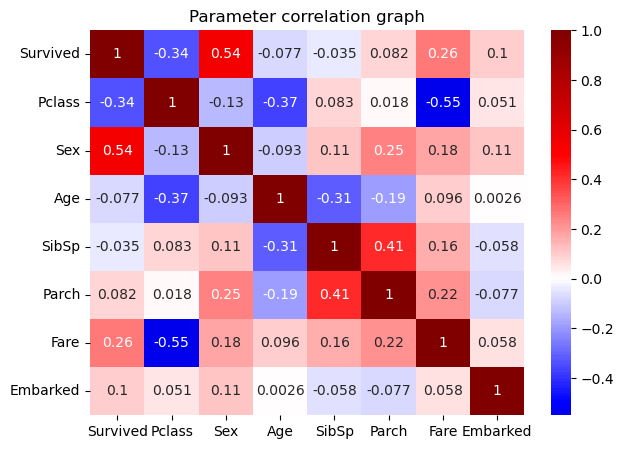

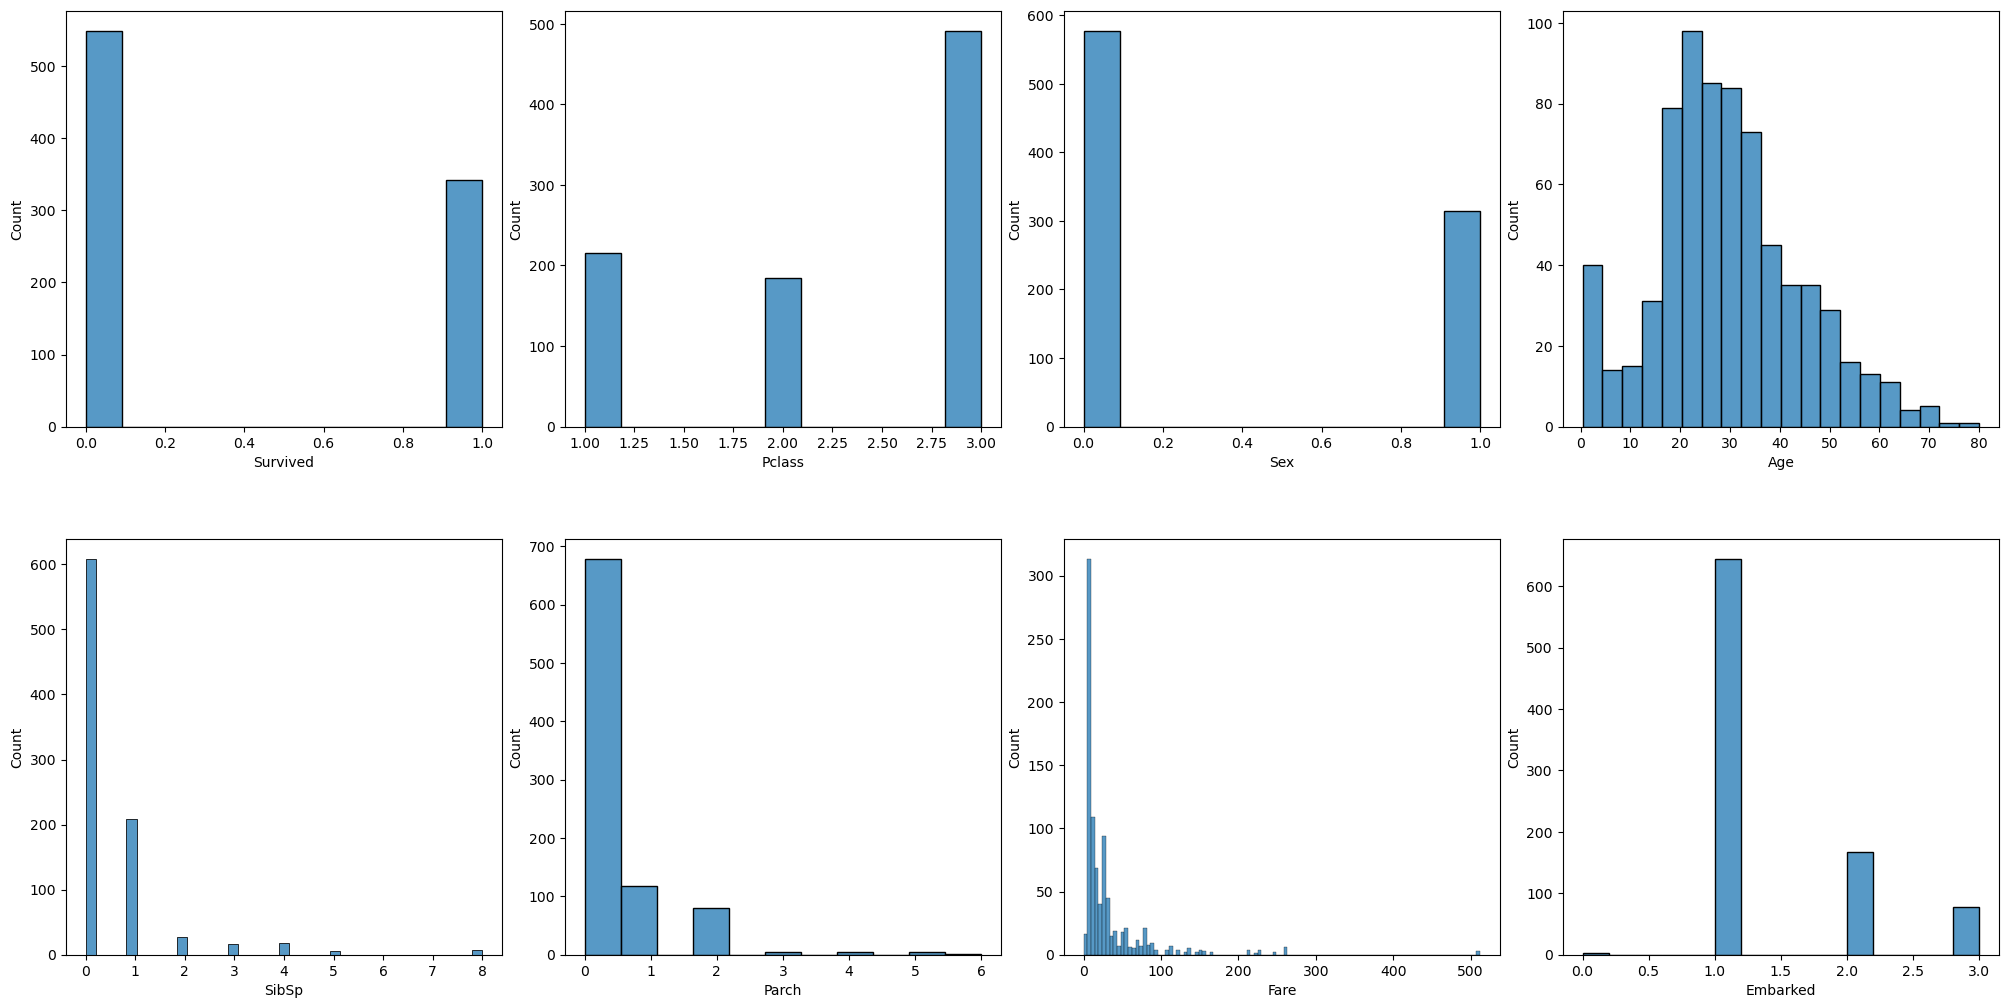

In [174]:
# Build correlation between parameters & parameter distribution
correlation_data = data.corr()

MyDataAnalysisHelper.build_heatmap(correlation_data=correlation_data, graph_title='Parameter correlation graph')
MyDataAnalysisHelper.build_parameter_distribution_graph(data, 4, 2)

Выводы:
- по корреляции сильнее всего на выживаемость влияет Sex и Pclass (выживали женщины и более обеспеченные)
- Age, SibSp, Parch, Embarked и Fare влияют очень слабо
- есть сильная зависимость между Fare и Pclass (что логично, чем ниже Fare, тем будет выше Pclass)
- есть сильная зависимость между SibSp и Parch (было много семей с детьми)
- есть зависимость между Age и Pclass (чем старше, тем выше класс)
- есть зависимость между Age и SibSp (чем старше, тем скорее всего без семьи)

In [175]:
# Filter survived data
survived_data = MyDataAnalysisHelper.filter_by_survival(data, survived=1)
print("Survived:\n")
survived_data.describe()

Survived:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,342.0,342.000000,342.000000,290.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,0.681287,28.343690,0.473684,0.464912,48.395408,1.441520
std,0.0,0.863321,0.466660,14.950952,0.708688,0.771712,66.596998,0.659535
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,19.000000,0.000000,0.000000,12.475000,1.000000
50%,1.0,2.000000,1.000000,28.000000,0.000000,0.000000,26.000000,1.000000
75%,1.0,3.000000,1.000000,36.000000,1.000000,1.000000,57.000000,2.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200,3.000000


Survived analysis


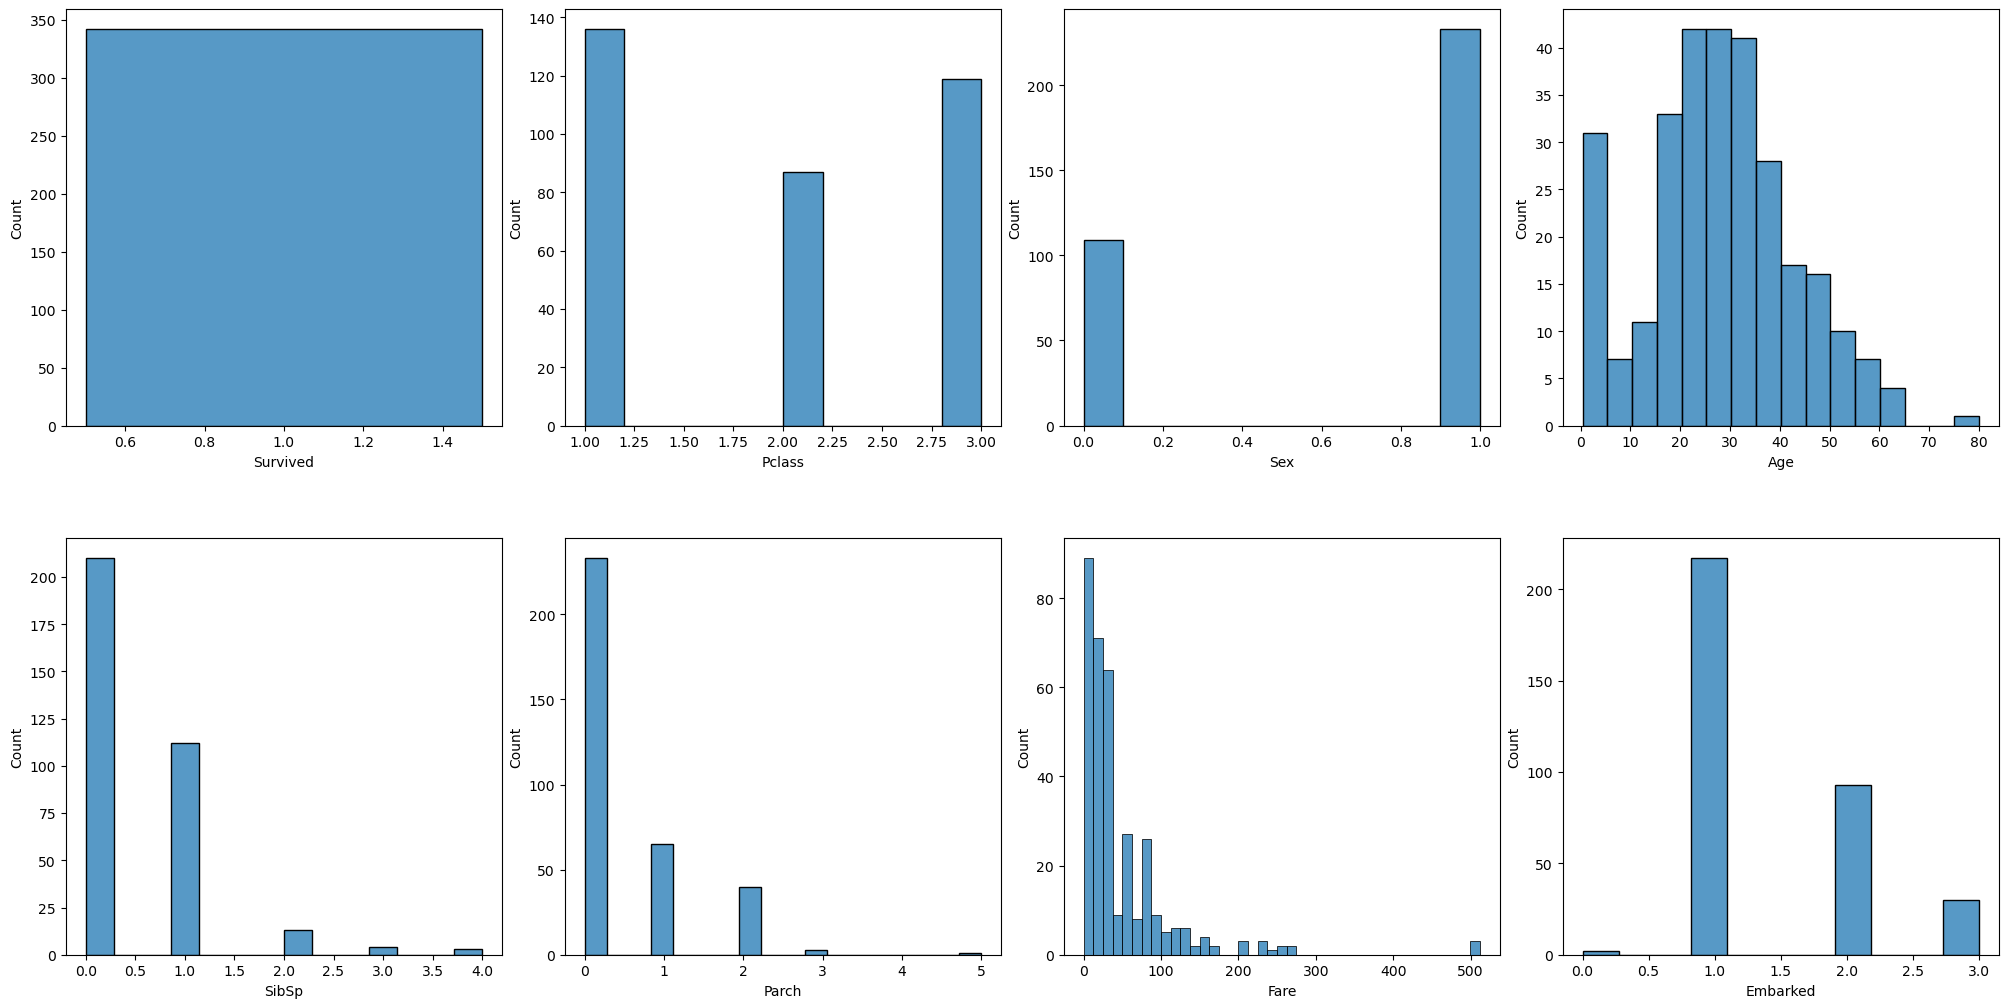

In [176]:
# Build parameter distribution for survived passengers
print('Survived analysis')
MyDataAnalysisHelper.build_parameter_distribution_graph(survived_data, 4, 2)

In [177]:
# Filter not survived data
not_survived_data = MyDataAnalysisHelper.filter_by_survival(data, survived=0)
print("Not survived:\n")
not_survived_data.describe()

Not survived:



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,549.0,549.000000,549.000000,424.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,0.147541,30.626179,0.553734,0.329690,22.117887,1.307832
std,0.0,0.735805,0.354968,14.172110,1.288399,0.823166,31.388207,0.620478
min,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,2.000000,0.000000,21.000000,0.000000,0.000000,7.854200,1.000000
50%,0.0,3.000000,0.000000,28.000000,0.000000,0.000000,10.500000,1.000000
75%,0.0,3.000000,0.000000,39.000000,1.000000,0.000000,26.000000,1.000000
max,0.0,3.000000,1.000000,74.000000,8.000000,6.000000,263.000000,3.000000


Not survived analysis


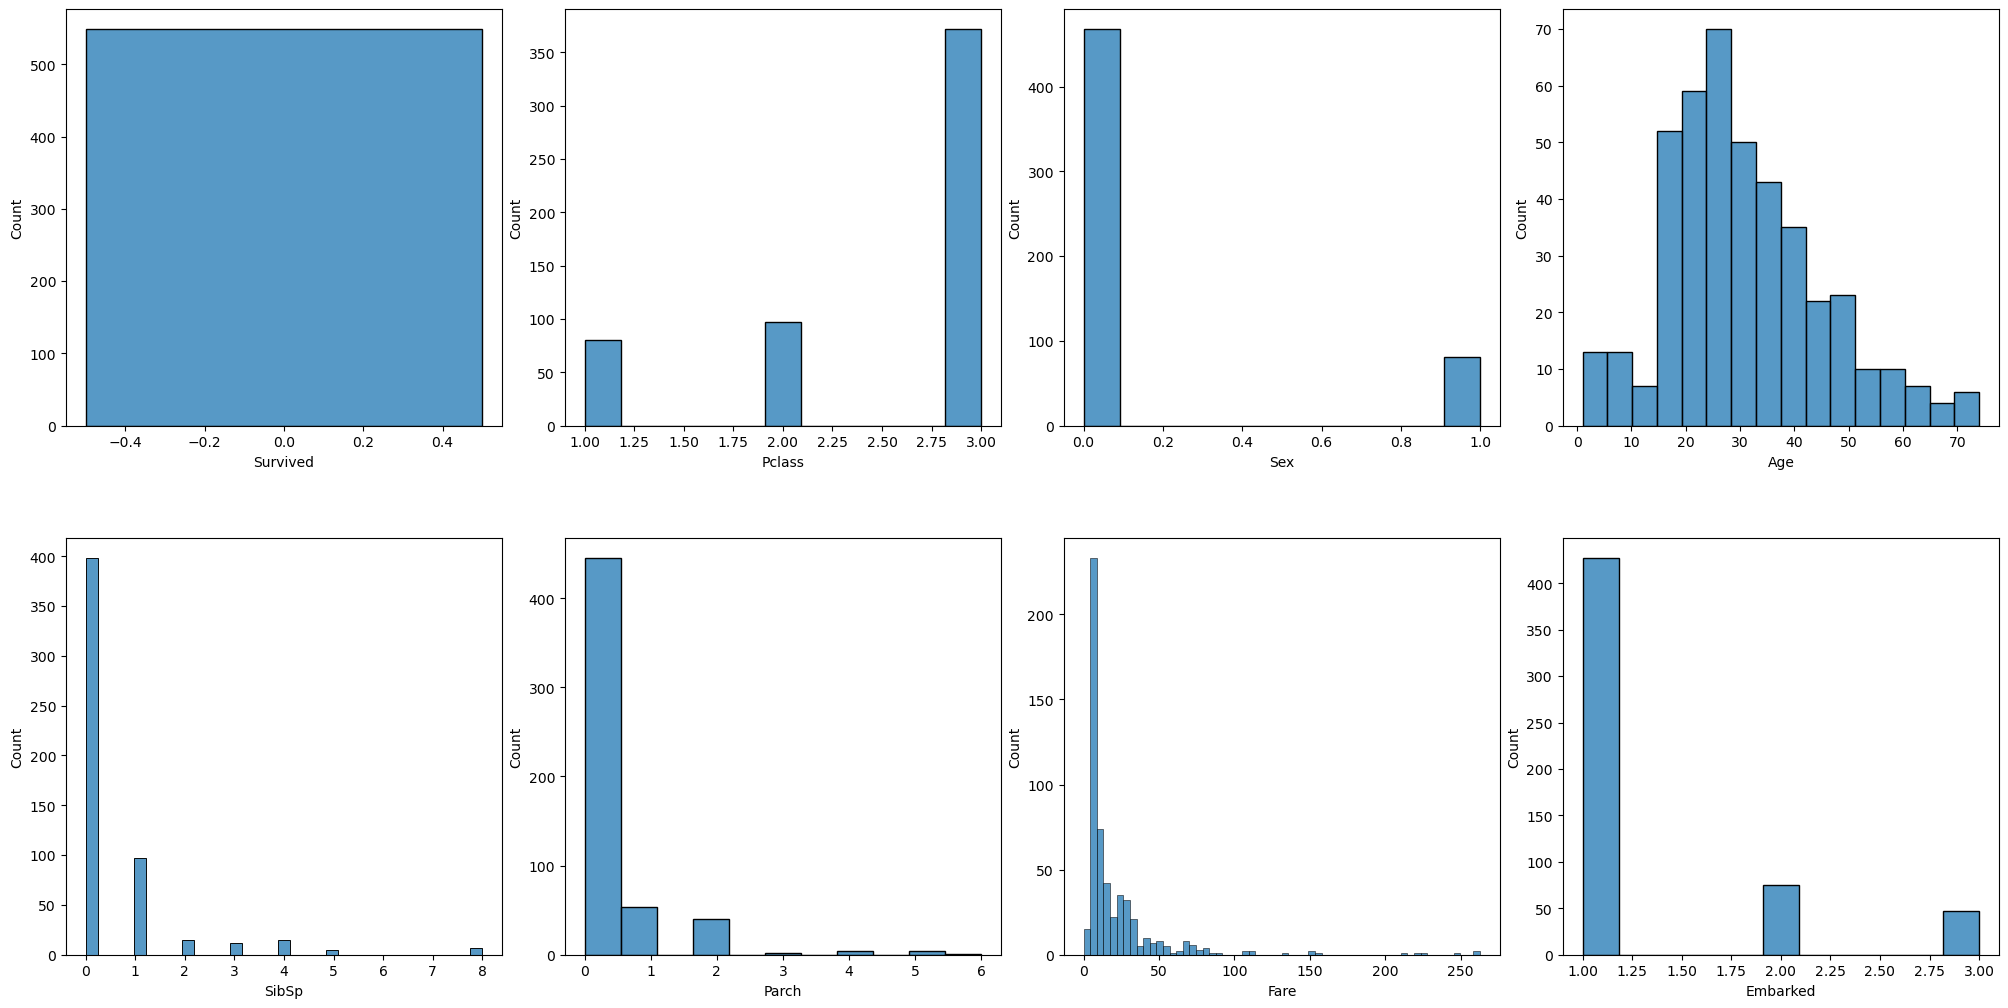

In [178]:
# Build parameter distribution for not survived passengers
print('Not survived analysis')
MyDataAnalysisHelper.build_parameter_distribution_graph(not_survived_data, 4, 2)

Итог:
- больше всего на выживаемость влияли Sex и Pclass: выжили в основном женщины 1 и 2 класса
- по Age, SibSp, Parch, Fare, Embarked в обоих группах распределение примерно одинаковое, корреляция Пирсона тоже подтвердила, что эти параментры не сильно влияли на выживаемость